<br></br>
# Data Mining and Decision Systems ACW
<br></br>
#### Student number: 201601628
<br>
<hr>

<a id="contents"></a>
<h1>Contents</h1>
<hr>
<div style="line-height: 2.5;">
<div><a href="#0"><h2 style="display: inline">.... 0. Notebook Initialisation</h2></a></div>
<div><a href="#01">........ <h3 style="display: inline">0.1. Package Imports</h3></a></div>
<div><a href="#02">........ <h3 style="display: inline">0.2. Data Loading</h3></a></div>
<div><a href="#03">........ <h3 style="display: inline">0.3. Misc</h3></a></div>
<p></p>
<div><a href="#1"><h2 style="display: inline">.... 1. CRISP DM</h2></a></div>
<div><a href="#11">........ <h3 style="display: inline">1.1. Business Understanding</h3></a></div>
<!--  -->
<div><a href="#12">........ <h3 style="display: inline">1.2. Data Understanding</h3></a></div>
<div><a href="#121">............ <h4 style="display: inline">1.2.1. Data Dictionary</h4></a></div>
<div><a href="#122">............ <h4 style="display: inline">1.2.2. Data Correctness</h4></a></div>
<div><a href="#1221">................ <h5 style="display: inline">1.2.2.1. Checking for Missing Data</h5></a></div>
<div><a href="#1222">................ <h5 style="display: inline">1.2.2.2. Checking for Duplicated Data</h5></a></div>
<div><a href="#1223">................ <h5 style="display: inline">1.2.2.3. Checking for Corrupt Data</h5></a></div>
<div><a href="#1224">................ <h5 style="display: inline">1.2.2.4. Evaluation of Concerns</h5></a></div>
<div><a href="#123">............ <h4 style="display: inline">1.2.3. Data Distribution</h4></a></div>
<div><a href="#124">............ <h4 style="display: inline">1.2.4. Feature Inspection</h4></a></div>
<div><a href="#125">............ <h4 style="display: inline">1.2.5. Evaluation of Understanding</h4></a></div>
<div><a href="#126">............ <h4 style="display: inline">1.2.6. Actions</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#13">........ <h3 style="display: inline">1.3. Data Preparation</h3></a></div>
<div><a href="#131">............ <h4 style="display: inline">1.3.1. Cleaning</h4></a></div>
<div><a href="#132">............ <h4 style="display: inline">1.3.2. Transformation</h4></a></div>
<div><a href="#133">............ <h4 style="display: inline">1.3.3. Stratification (TTS)</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#14">........ <h3 style="display: inline">1.4. Modeling</h3></a></div>
<div><a href="#141">............ <h4 style="display: inline">1.4.1. Baseline Models (all features)</h4></a></div>
<div><a href="#142">............ <h4 style="display: inline">1.4.2. Baseline Models (selected features)</h4></a></div>
<div><a href="#143">............ <h4 style="display: inline">1.4.3. Model Selection</h4></a></div>
<div><a href="#144">............ <h4 style="display: inline">1.4.4. Hyperparemeter Tuning</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#15">........ <h3 style="display: inline">1.5. Evaluation</h3></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#16">........ <h3 style="display: inline">1.6. (Theoretical) Deployment</h3></a></div>
</div>

<!--  Data Understanding
Data dictionary
	Data assumptions
		Data conformity
			Cols exist
			Number of categories
			Category correctness
			Data types
		
		Missing data

		Duplicated data
			Duplicated records
			Duplicated attributes

		Data distribution/balance/outliers		

		Data correlations and feature inspection
			Univariate
			Covariate (with label)
			Multivariate (with label)
			Apriori

		Inspect and understand concerns

		Actions
		
Data prep
	Clean according to understanding
	Normalise and Encode
	TTS
		Compare with raw data


Modeling
	Baseline model all features & all models
		kfold
		multi-linear?
		dtree
		dnn	
	Baseline model selected features
		kfold
		dtree
		dnn
	Select best model
		tune hyperparams

Data prep2 
	impute missing data
	better or worse performance ? -->

<a id="0"></a>
<h2>0. Notebook Initialisation</h2>

<a id="01"></a>
<h3>0.1. Package Imports</h3>

In [1]:
## Import all libraries for use in notebook.
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np

from sklearn import model_selection, linear_model
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from collections import defaultdict ## Used in automating and collating data discrepancies.
import datetime ## Used to check the correct data is being loaded after the deadline.

%matplotlib inline

<a href="#contents">[back to top]</a>

<a id="02"></a>
<h3>0.2. Data Loading</h3>

In [2]:
deadline = datetime.date(day=12,month=12, year=2019)
path = "data.csv" ## Relative path to train/test data.
## Failsafe incase I forget to swap in the orginal csv for submission after testing on modified versions.
if (deadline < datetime.date.today()):
    path = "data.csv" ## Relative path to train/test data.
    print("Forgot to change data input to default acw csv; switched to correct dataset.")

rawData = pd.read_csv(path) ## Will reamin untouched for reference.
rawData.columns = [col.lower() for col in rawData.columns] ## Make headers lowercase to avoid some trivial errors.
cleanData = rawData.copy()

rawData ## Show

,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


<a href="#contents">[back to top]</a>

<a id="03"></a>
<h3>0.3. Misc</h3>
Define some variables for easy access to properties of the raw data.

In [3]:
rawNRows = rawData.shape[0]
rawNCols = rawData.shape[1]
rawColNames = rawData.columns.values # Often used as an iterator.
concerns = defaultdict(list) ## Dict for storing data discrepencies to output at the end of checks.

## For pretty printing.
## ''' n == number of indents '''
def Indent(n=1):
    indent = "    " * n
    return indent

<a href="#contents">[back to top]</a>

<a id="1"></a>
<h2>1. CRISP DM</h2>
<img src="crisp-dm.png" style="max-height:300px">
<a href="#contents">[back to top]</a>

<a id="11"></a>
<h3>1.1. Business Understanding</h3>

<div style="font-size: 14px">
<p>DOMAIN: Cardio-vascular medicine / healthcare</p>
<p>PROBLEM TYPE: Classification</p>
<p>INPUTS: Tabulated patient data</p>
<p>OUTPUTS:</p>
    <ul>
        <li>Risk</li>
        <li>No Risk</li>
    </ul>
</div>

<a href="#contents">[back to top]</a>

<a id="12"></a>
<h3>1.2. Data Understanding</h3>
Inspect a copy (for safety) of the raw data, as-is. 

In [4]:
df = rawData.copy()

<a id="121"></a>
<h4>1.2.1. Data Dictionary</h4>

<table>
    <tbody>
        <tr>
            <td>
                <p><strong>Attribute</strong></p>
            </td>
            <td>
                <p><strong>Value Type</strong></p>
            </td>
            <td>
                <p><strong>NumberOfValues</strong></p>
            </td>
            <td>
                <p><strong>Values</strong></p>
            </td>
            <td>
                <p><strong>Comment</strong></p>
            </td>
            <td>
                <p><strong>Non-clinical Description</strong></p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Random</p>
            </td>
            <td>
                <p>Real</p>
            </td>
            <td>
                <p>Number of Records</p>
            </td>
            <td>
                <p>Unique</p>
            </td>
            <td>
                <p>Real number of help in randomly sorting the data records</p>
            </td>
            <td>
                <p>Real number of&nbsp;help&nbsp;in randomly sorting the data records: Should be unique values.</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Id</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Max of Number of Records</p>
            </td>
            <td>
                <p>Unique to patient</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique values unless patient has multiple sessions</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique value per patient. Patient can have multiple sessions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Indication</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Four</p>
            </td>
            <td>
                <p>{a-f, asx, cva, tia}</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p><p> a-f :&nbsp;Atrial-Fibrillation</p>
                <p>asx&nbsp;:&nbsp;Asymptomatic Stenosis&nbsp;</p><p>cva&nbsp;: Cardiovascular Arrest</p>
                <p>tia&nbsp;:&nbsp;Transient Ischemic Attack ("mini-heart attack")</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Diabetes</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IHD</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Hypertension</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Arrhythmia</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from</p>
                <p>Arrhythmia (i.e. erratic heart beat)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Arrhythmia (i.e. erratic&nbsp;heart beat)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>History</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Has the patient a history of</p>
                <p>Cardiovascular interventions?</p>
            </td>
            <td>
                <p>Has the patient a history of Cardiovascular interventions?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IPSI</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Contra</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Label</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{risk, norisk}</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
        </tr>
    </tbody>

<br>
<b style="color: red;">NOTE:</b> "Session" is also included in the non-clinical description, but not included in the data dictionary.
<br>
<table>
    <tr>
        <td>
            <p><strong>Attribute</strong></p>
        </td>
        <td>
            <p><strong>Value Type</strong></p>
        </td>
        <td>
            <p><strong>NumberOfValues</strong></p>
        </td>
        <td>
            <p><strong>Values</strong></p>
        </td>
        <td>
            <p><strong>Comment</strong></p>
        </td>
        <td>
            <p><strong>Non-clinical Description</strong></p>
        </td>
    </tr>
    <tr>
        <td>
            <p>Session</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Max Number of Records (assumed)</p>
        </td>
        <td>
            <p>Unique to patient</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Anonymous patient session identifier.</p>
        </td>
    </tr>
</table>
<br>

<a href="#contents">[back to top]</a>

<a id="122"></a>
<h4>1.2.2. Data Correctness</h4>
Check for data conformity to data dictionary and explore common pitfalls (e.g. missing or duplicate data). All checks are collated in a dictionary ("concerns") by  type of check (e.g. "MISSING DATA") to help notebook readability.

<a id="1221"></a>
<h5>1.2.2.1 Checking for Missing Data</h5>
Look for records containing nan or missing values:

In [5]:
df = rawData.copy()
concerns["MISSING DATA"] = [Indent() + "The following columns have missing data:"] ## Init list for missing data concerns.
records = []

for col in rawColNames:
    nans = df[col][df[col].isna() == True]
    indexes = nans.index.values
    nNans = len(nans)
    
    if (nNans > 0):
        concernStr = (Indent(2) + col + " has " + str(nNans) + " nan values at indexes:" + str(indexes))
        concerns["MISSING DATA"].append(concernStr)
        records += list(indexes)

nRecords = len(set(records))
percent = (100/rawNRows) * nRecords
concerns["MISSING DATA"][0] = (Indent() + "The following columns have missing data which affects " + str(nRecords) + " records (" + str(round(percent, 2)) + "% of all records).")

<a href="#contents">[back to top]</a>

<!-- <a href="#0">[back to top]</a> -->

<a id="1222"></a>
<h5>1.2.2.2 Checking for Duplicated Data</h5>
Look for records that are entirely the same or very similiar (e.g. allow different values for random or id).

In [6]:
## Helper function for checking for duplicates when any number of columns are dropped.
## ''' ignore == list of columns to drop '''
def CheckForDuplicates(ignore=[]):
    df = rawData.copy()#.dropna()
    dupes = df.drop(columns=ignore)[df.drop(columns=ignore).duplicated() == True]
    if dupes.shape[0] > 0:
        return dupes
    else:
        return 0 # "No duplicates."
    
## Helper function for appending duplicates to concerns.
## ''' dupes == df => result from CheckForDuplicates() '''
## ''' out == bool => print output or not '''
def AppendDuplicateConcerns(dupes, ignore="NO", out=False):
    if (type(returnVal) != int):
        ## When ignoring # columns, there are n duplicated records at indexes [].
        nDupes = str(len(dupes))
        indexes = dupes.index.values
        concerns["DUPLICATED DATA"].append(Indent(2) + str(nDupes) + " duplicates were found when ignoring columns " + str(ignore) + " at indexes " + str(indexes))
        if (out):
            print(dupes)

Check for records that are complete duplicates:

In [7]:
concerns["DUPLICATED DATA"] = [Indent() + "The following potential duplicates were found:"] ## Init list.
returnVal = CheckForDuplicates()
AppendDuplicateConcerns(returnVal)

Check for records that are duplicates when any single column is removed:

In [8]:
for col in rawColNames:
    returnVal = CheckForDuplicates(ignore=[col])
    AppendDuplicateConcerns(returnVal, [col])

Check for records that are duplicates when any pair of features are ignored:

In [9]:
## Nested for loop to check ALL combinatory pairs.
i = 0
for colO in rawColNames: ## Outer column; i.e. column[n].
    i+=1
    for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
        ignoring = [colO, colI]
        returnVal = CheckForDuplicates(ignore=ignoring)
        AppendDuplicateConcerns(returnVal, ignore=ignoring)

Check for records that are duplicates when any trio of features are ignored:

<b style="color: red">NOTE:</b> this code has been commented out for readability. The omission of random and id results and any other feature results 90%+ "duplicates".

In [10]:
# i = 0
# j = 1
# for colO in rawColNames: ## Outer column; i.e. column[n].
#     i += 1
#     for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
#         j += 1
#         for colIM in rawColNames[j:]: ## Innermost column; i.e. column[n+1+1].
#             ignoring = [colO, colI, colIM]
#             returnVal = CheckForDuplicates(ignore=ignoring)
#             AppendDuplicateConcerns(returnVal, ignore=ignoring)

<a href="#contents">[back to top]</a>

<a id="1223"></a>
<h5>1.2.2.3 Checking for Corrupted Data</h5>
Create an object that defines a set of assumptions as described in the data dictionary and flag any concerns.

In [11]:
# Dict derived from data dictionary for automated checking.
## key == column name.
## - valType == python data type.
## - nVals == range of accepted values for continuous column.
## - vals == possible values for any categoric or discrete column.

dataAssumptions = {
    "random":{ ## Col name.
        "valType": float, ## Real.
        "nVals": (rawNRows, rawNRows), # Unique per record.
    },  
    "id":{
        "valType": int,## Integer.
        "nVals": (1, rawNRows), ## Unique per patient.
    },
    "indication":{
        "valType": str, ## Nominal.
        "vals": ["a-f","asx","cva","tia"] ## Possible values (except nan).
    },
    "diabetes":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ihd":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "hypertension":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "arrhythmia":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "history": {
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ipsi": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101) # Percentage.
    },
    "contra": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101), # Percentage.
    },
    "label": {
        "valType": str, ## Nominal.
        "vals": ["risk", "norisk"]
    },
    "session":{ ## This feature was given separate to the dictionary.
        "valType": object, # Unknown.
        "nVals": (1, rawNRows), ## Unique per patient (assumed).
    },
}

Check that all expected columns exist in the data:

In [12]:
df = rawData.copy()#.dropna()
concerns["MISSING COLUMNS"] = [Indent() + "The following expected columns are missing from the data:"] ## Init list.

for key in dataAssumptions:
    if (key not in rawColNames):
        concerns["MISSING COLUMNS"].append(Indent(2) + key)
# print(concerns["MISSING COLUMNS"])

Check that the number of unique values or categories (excluding nan) in each column is as expected.

In [13]:
df = rawData.copy().dropna()
concerns["NUMBER OF UNIQUE VALUES"] = [Indent() + "The following columns have an unexpected number of unique values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames): ## If it is a column we are aware of...
        actualNValues = len(df[k].unique()) ## Get unique values.
        try:
            expectedNValues = (1, len(v["vals"])) ## Assume is a discrete or categoric column.
        except:
            expectedNValues = v["nVals"] ## Actually, column is continuous.

        if (not(actualNValues >= expectedNValues[0]) or not(actualNValues <= expectedNValues[1])): ## Check actual number of values is within the expected range.           
            concerns["NUMBER OF UNIQUE VALUES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedNValues) + "\n" + Indent(3)+ "Actual: " + str(actualNValues))

Check that the unique values or categories in each column are as expected.

In [14]:
df = rawData.copy()#.dropna()
concerns["EXPECTED VALUES"] = [Indent() + "The following columns have unexpected values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualValues = df[k].dropna().unique() ## Ignore nan values for this check.
        try: ## Assume column is categorical/discrete.
            expectedValues = v["vals"]
            if (not(set(actualValues) & set(expectedValues))):
                concerns["EXPECTED VALUES"].append(Indent(2) + k+ "\n" + Indent(3)+ "Expected: " + str(set(expectedValues)) + "\n" + Indent(3)+ "Actual: " + str(set(actualValues)) + "\n")
        except: ## Is not categorical column.
            continue 

Check that the data type of each column is as expected:

In [15]:
df = rawData.copy()#.dropna()
concerns["EXPECTED TYPES"] = [Indent() + "The following columns have entries of the wrong data type:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualT = df[k].dropna().describe().dtypes ## Ignore nan values for this check.
        expectedT = v["valType"] 

        if (expectedT == int or expectedT == float):
            correctT = is_numeric_dtype(actualT) ## Check is numeric.
        else:
            correctT = is_string_dtype(actualT) ## Check is obj/str.
        
        if (not correctT):
            concerns["EXPECTED TYPES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedT) + "\n" + Indent(3) +"Actual: " + str(actualT))

<a id="1224"></a>
<h5>1.2.2.4. Evaluation of Concerns</h5>
Look at collated concerns before further analysis.

In [16]:
actions = [] ## Create list to store actions to be carried out in the cleaning phase.

for key in concerns:
    print ("\n" + str(key) + "\n")
    for val in concerns[key]:
        print(val)
    print("\n________________________________________________________________\n")


MISSING DATA

    The following columns have missing data which affects 17 records (1.12% of all records).
        indication has 3 nan values at indexes:[ 442  822 1007]
        diabetes has 2 nan values at indexes:[447 514]
        hypertension has 3 nan values at indexes:[201 590 983]
        history has 2 nan values at indexes:[337 784]
        ipsi has 4 nan values at indexes:[620 752 845 916]
        label has 3 nan values at indexes:[ 812  974 1418]

________________________________________________________________


DUPLICATED DATA

    The following potential duplicates were found:
        1094 duplicates were found when ignoring columns ['random', 'id'] at indexes [  13   62   65 ... 1517 1518 1519]
        1 duplicates were found when ignoring columns ['id', 'contra'] at indexes [1134]

________________________________________________________________


MISSING COLUMNS

    The following expected columns are missing from the data:
        session

____________________________

<b>Missing Data</b>

Thankfully, there is a very small amount of data missing. With only 1.12% of the data affected, the effect of imputing values would probably be slight, or even cause more harm than good.

- <p style="color: red">Initially, the 17 records will be removed.<p>

- <p style="color: red">For continued analysis (i.e. plotting distributions etc.) these records will be ignored for the time being.</p>

In [17]:
actions.append("Drop nan values. (cleanData = cleanData.dropna())")

<b>Duplicated Data</b>

1. This check finds that no records are duplicated in their entirety, or when a single column is ignored.


2. When pairs of columns are ignored, some duplicates appear.
    - 1094 duplicates were found when ignoring columns ['random', 'id'].
    
        This suggests quite a homogenous data set regardless of duplicates, since these features are the only ones supposed to be unique. This suggestion is supported by the quantity of 'duplicates', the fact that no duplicates were reported when 'random' alone was removed, and the fact that id is unique as expected (see below).
    
    -
        
    - 1 duplicates were found when ignoring columns ['id', 'contra'].
    
        Assuming that this dataset was manually created in a tool like Excel, a telltale sign would be if the duplicate records are next to each other.


3. Checking for duplicates with combinations of 3 features removed proved redundant based on the effect of removing 'id' and 'random'; removing another column means almost all of the data (90%+) is duplicated, which is assumed tp be highly unlikely.

-

To be thorough, a check can be made for the locality of supposed duplicates. A depth of 3 has been selected arbitrarily (i.e. check if a given record is the same as any of the next 3 records): 

In [18]:
df = rawData.copy()#.dropna()
df = df.drop(columns=["id","random"])
df = df[df.duplicated(keep=False) == True]
depth = 3 ## Look for duplicates that are up-to n.. records apart.

# Init lists in dictionary.
dupes = {}
for i in range(1, depth + 1):
    dupes[str(i) + " records away"] = []

i = 0
for index, row in df.iterrows():
    i += 1
    for nextIndex, nextRow in df[i:i+1].iterrows(): ## Grab next record.
        for j in range(1, depth + 1):
            if ((nextIndex == index + j) and set(row) == set(nextRow)): ## Check if index is local and values are same.
                dupes[str(j) + " records away"].append((index, nextIndex))
        
dupes

{'1 records away': [(493, 494), (889, 890), (1043, 1044), (1243, 1244)],
 '2 records away': [(452, 454)],
 '3 records away': []}

This additional check shows that 4 of the duplicates found in this subset of the data are found consecutively. Similarly, 1 duplicate is found with a single record between it and the possible duplicate, and no duplicates are 3 apart.

This check makes the assumption that the given data is in the same order as it was created, and that the chances of inputing the same record more than 3 records away is unlikely.

- <p style="color: red">Based on these assumptions and the small amount of reasonable/local duplicates, it may be wise to leave these datapoints out of the models to begin with.</p>

In [19]:
actions.append("Remove possible duplicates. (cleanData = cleanData.drop([493,889,1043,1243,452]))")

<b>Missing Columns</b>

The check shows that the "session" column is missing, which isn't actually in the given data dictionary. Since all patient id's are unique in this data set, it could be that it has been removed because there are no additional visits (sessions) for any record.

Out of curiosity and on the off-chance that this assumption is incorrect, consideration was given to the possibility that the session information might be encoded into the random or id features.

To explore this, the data was opened in Excel to see how the data behaved when the format was changed to date or time. This revealed that the random values were a lot larger than displayed in the jupyter notebook (e.g. 0.6893308196912509) and neither the id or random features could be reliably converted.


- <p style="color: red">Ultimately, model creation will continue under the assumption that the session column is deliberately omitted.</p>

<b>Number of Unique Values</b>

This check found issues with the number of values in the random, indication, and label columns.

RANDOM:

    Expected: 1520
    Actual: 1212

    Random is described as being unique per-patient in the data dictionary, hence the expected 1520 values. Presumably,
    however, the missing values can be attributed to duplicated or nan values.

In [20]:
df = rawData.copy()
print (str(df.shape[0]) + " total records.")
nDupes = df[df["random"].duplicated() == True].shape[0]
nMissing = df["random"].shape[0] - df["random"].unique().shape[0]
nNan = df[df["random"] == np.isnan].shape[0]
print(str(nMissing) + "  unique 'random' values are missing.")
print(str(nDupes) + " 'random' values are duplicated.")
print(str(nNan) + " 'random' values are nan.")
stillMissing = nMissing - (nDupes + nNan)
print (str(stillMissing) + " remain records unaccounted for.")

1520 total records.
298  unique 'random' values are missing.
298 'random' values are duplicated.
0 'random' values are nan.
0 remain records unaccounted for.


The random feature may still be random, but it isn't unique as as described in the data dictionary. The possibility that information is encoded in the random value is possible but seems unlikely, and has been explored to some degree in regard to the missing, "session" column. These ideas can be explored further by taking some statistical mesasures:

Mean: 0.5095450426428438
Median: 0.517615648147363
Mode: 0.506596920679855
Std: 0.28400622461301955


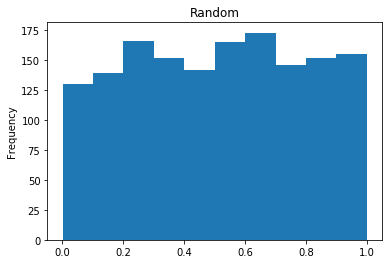

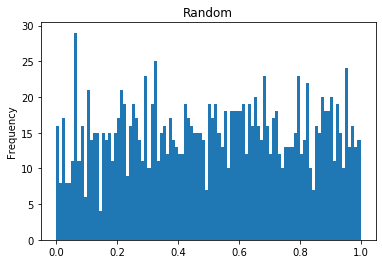

In [21]:
df = rawData.copy()
df = df["random"]
print("Mean: " + str(df.mean()))
print("Median: " + str(df.median()))
print("Mode: " + str(df.mode()[0]))
print("Std: " + str(df.std()))
df.plot(kind='hist',title='Random')
plt.show()
df.plot(kind='hist',title='Random', bins=100)
plt.show()

While it isn't unique the plateu/random histogram and similarities of the different averages supports that it is random, which means it should add little-no value to any classifications.

- <p style="color: red">Remove random as feature.</p>

In [22]:
actions.append("Remove 'random' feature. (cleanData = cleanData.drop(columns=['random']))")

INDICATION:

    Expected: 1 to 4
    Actual: 5

In [23]:
df = rawData.copy()
df = df["indication"]
df.unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [24]:
print("ASx count: " + str(len(df[df == "ASx"])))
print("Asx count: " + str(len(df[df == "Asx"])))

ASx count: 186
Asx count: 32


The data dictionary provides 4 classes for the indication feature, but there are 5.

ASx and Asx could potentially be 2 separate classes, considering that neither value is a one-off, but based on the dictionary, it might be safe to assume human error.

- <p style="color: red">Treat the 2 'asx' variations as the same; convert all values to lowercase.</p>

In [25]:
actions.append("Convert 'indications' to lower case. (cleanData['indication'] = cleanData['indication'].apply(lambda x: str(x).lower()))")

LABEL:

    Expected: 1 to 2
    Actual: 3

In [26]:
df = rawData.copy()
df = df["label"]
df.unique()

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [27]:
indexes = df[df == "Unknown"].index.values
print("Unknown count: " + str(len(df[df == "Unknown"])))
print("Indexes: " + str(indexes))

Unknown count: 2
Indexes: [475 523]


The data dictionary provides 2 classes for the label feature (risk, norisk), but there are 3 (excluding nan).

Since the purpose of the end model will be to predict risk or no-risk, and since there are only 2 "unknown" classifications, it makes most senseto remove these records as they are not represented well enough to understand further. 

The label could be imputed, but there is not enough domain knowledge to justify this and the only 2 records would hopefully provide little-no benefit.

- <p style="color: red">Remove records classified as "unknown".</p>

In [28]:
actions.append("Remove 'unknown' cases. (cleanData = cleanData.drop([475, 523]))")

<b>Expected Values</b>

There were unexpected values found in columns: indication, contra, label. Label and indication have been adressed in the previous section.

It is clear to see that contra was raised because the expected values are integers (as per the data dictionary), whilst actual values are strings.

Some of these strings are blank, which will need to be converted to nan and missing data will be re-evaluated.

In [29]:
df = rawData.copy()
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))
nNans = len(cleanData["contra"][cleanData["contra"].isna() == True])
print(str(nNans) + " additional nans created.")

0 additional nans created.


To begin with, remove the record.

- <p style="color: red">Convert blank-string values to nan.</p>
- <p style="color: red">Convert contra column to numeric.</p>
- <p style="color: red">Remove nan.</p>

In [30]:
actions.append("Convert 'contra' blanks to nan. (cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True))") ## https://stackoverflow.com/a/21942746 [acessed 20/11/19]
actions.append("Convert 'contra' values to numbers. (cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)))")
actions.append("Remove additional nan. (cleanData = cleanData.dropna())")

<b>Expected Types</b>

The only non-conforming feature was contra, which was resolved in the previous section.

<b>Other</b>

Since the id feature is unique to each patient and it hasn't been determined to contain session information, it can probably be dropped. This decision might be supported by a heatmap of correlations between features:

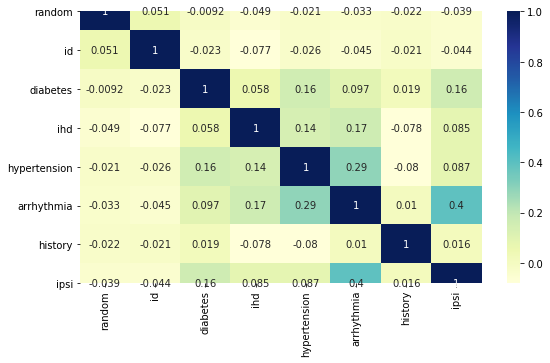

In [31]:
df = rawData.copy()


for col in df.columns.values:
    df = df.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0]) ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

correlations = df.corr()
plt.figure(figsize=(9,5))
sns.heatmap(correlations, annot=True, cmap="YlGnBu")

The heatmap suggests that there is some correlation between random and id, but not much else.

- <p style="color: red">Drop id column.</p>

In [32]:
actions.append("Drop id column. (cleanData = cleanData.drop(columns=['id']))")

<a href="#contents">[back to top]</a>

<a id="123"></a>
<h4>1.2.3. Data Distribution</h4>
Plot data distribution to gain insight into the class balance, outliers and any other patterns.

In [33]:
actions

['Drop nan values. (cleanData = cleanData.dropna())',
 'Remove possible duplicates. (cleanData = cleanData.drop([493,889,1043,1243,452]))',
 "Remove 'random' feature. (cleanData = cleanData.drop(columns=['random']))",
 "Convert 'indications' to lower case. (cleanData['indication'] = cleanData['indication'].apply(lambda x: str(x).lower()))",
 "Remove 'unknown' cases. (cleanData = cleanData.drop([475, 523]))",
 "Convert 'contra' blanks to nan. (cleanData['contra'] = cleanData['contra'].replace(r'^\\s*$', np.nan, regex=True))",
 "Convert 'contra' values to numbers. (cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)))",
 'Remove additional nan. (cleanData = cleanData.dropna())',
 "Drop id column. (cleanData = cleanData.drop(columns=['id']))"]

In [34]:
df = rawData.copy()
tempCleaned = rawData.copy()

tempCleaned = tempCleaned.drop([493,889,1043,1243,452,475,523])
tempCleaned = tempCleaned.drop(columns=["random", "id"])
tempCleaned["indication"] = tempCleaned["indication"].apply(lambda x: str(x).lower())
tempCleaned["contra"] = tempCleaned["contra"].replace(r'^\s*$', np.nan, regex=True)
tempCleaned = tempCleaned.replace("nan", np.nan)
tempCleaned = tempCleaned.dropna()
tempCleaned["contra"] = tempCleaned["contra"].apply(lambda x: int(x))

tempCleaned

,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
0,a-f,no,no,yes,no,no,78.0,20,NoRisk
1,tia,no,no,no,no,no,70.0,60,NoRisk
2,a-f,no,yes,yes,no,no,95.0,40,Risk
3,tia,no,no,yes,no,no,90.0,85,Risk
4,cva,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,a-f,no,yes,no,no,no,76.0,60,NoRisk
1516,a-f,no,no,yes,yes,no,90.0,75,Risk
1517,tia,no,no,yes,no,no,75.0,20,NoRisk
1518,a-f,no,yes,no,no,no,70.0,45,NoRisk



    RANDOM RAW                                                RANDOM CLEANED
                                                                Column was removed.


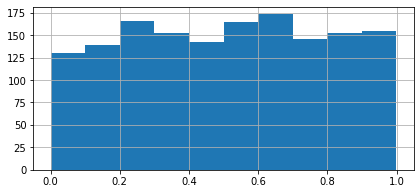


    ID RAW                                                    ID CLEANED
                                                                Column was removed.


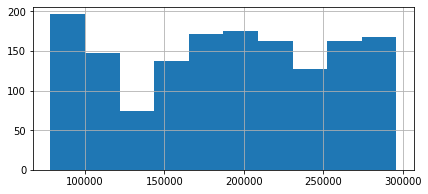


    INDICATION RAW                                            INDICATION CLEANED


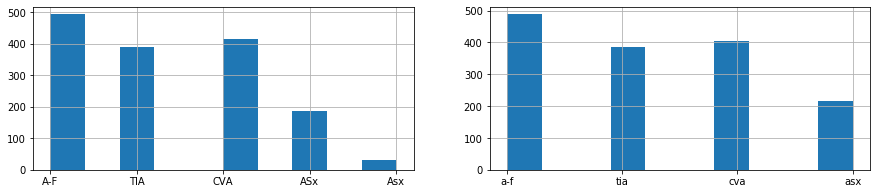


    DIABETES RAW                                            DIABETES CLEANED


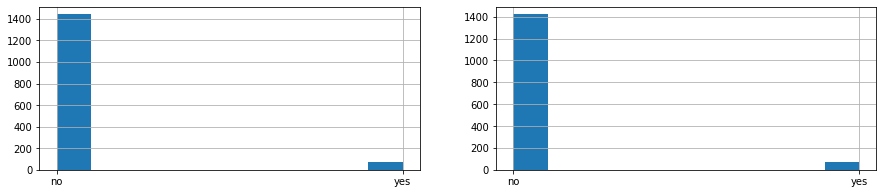


    IHD RAW                                                    IHD CLEANED


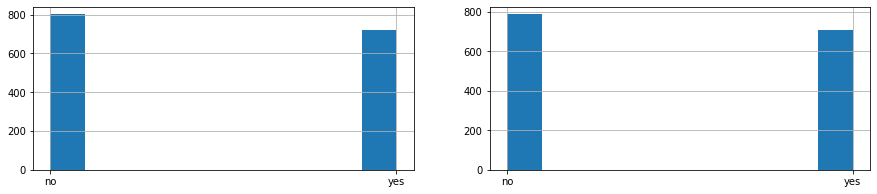


    HYPERTENSION RAW                                        HYPERTENSION CLEANED


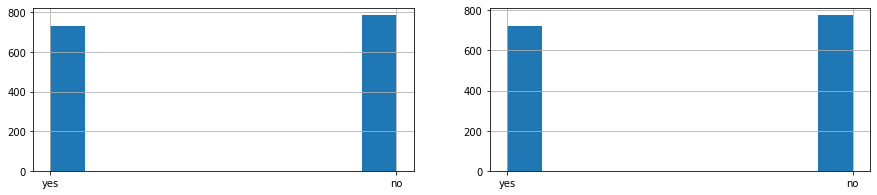


    ARRHYTHMIA RAW                                            ARRHYTHMIA CLEANED


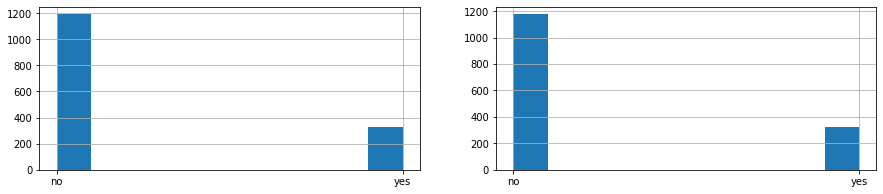


    HISTORY RAW                                                HISTORY CLEANED


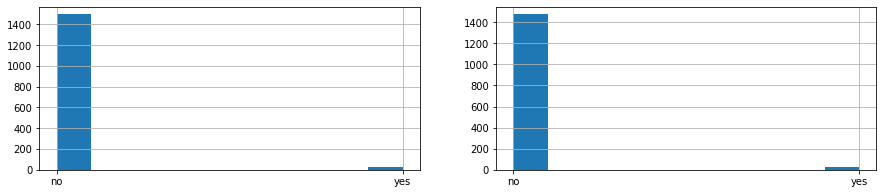


    IPSI RAW                                                IPSI CLEANED


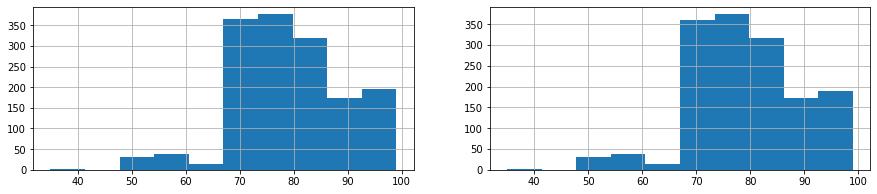


    CONTRA RAW                                                CONTRA CLEANED


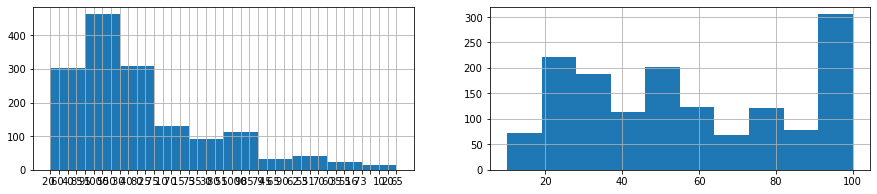


    LABEL RAW                                                LABEL CLEANED


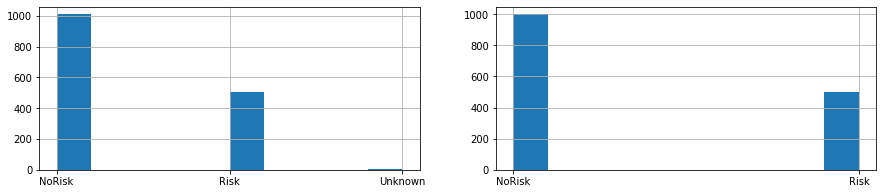

In [35]:
for col in rawColNames:
    ## d, l, n are just variables to calculate indentation
    n = 7
    l = len(col+ " RAW")
    d = int((l / 4))
    print("\n" + Indent() + col.upper() + " RAW" + Indent(14 - d) + col.upper() + " CLEANED")

    plt.figure(figsize=(15,3))
    plt.subplot(1, 2, 1)
    df[col].hist()

    if (col in tempCleaned.columns.values):
        plt.subplot(1, 2, 2)
        tempCleaned[col].hist()
    else:
        print(Indent(16) + "Column was removed.")

    plt.show()

and?

                                                                RANDOM column was removed.
                                                                ID column was removed.


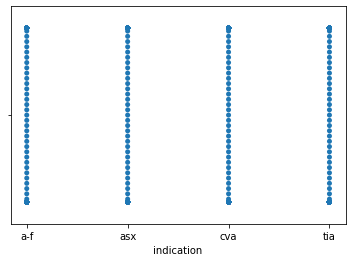

In [ ]:
for col in rawColNames:
    if (col in tempCleaned.columns.values):
#         tempCleaned[col].hist()
        sns.swarmplot(x=col,  hue="label", data=tempCleaned[[col, "label"]])
    else:
        print(col.upper() + " column was removed.")

    plt.show()

In [ ]:
print("Mean:\n" + str(df.mean()))
print("\nMedian:\n" + str(df.median()))
print("\nMode:\n" + str(df.mode()))
print("\nStd:\n" + str(df.std()))

In [ ]:
df = df.dropna()
df = df["id"]
df = (df / 10000)/ 30  ## Simplify numbers to be between 0 and 1.
df.hist(bins=12)

In [ ]:
print("Mean: " + str(df.mean()))
print("Median: " + str(df.median()))
print("Mode: " + str(df.mode()))
print("Std: " + str(df.std()))

<a href="#contents">[back to top]</a>

<a id="124"></a>
<h4>1.2.4. Feature Inspection</h4>

<a href="#contents">[back to top]</a>

<a id="125"></a>
<h4>1.2.5. Evaluation of Understanding</h4>
Output collated concerns and evaluate.

<a href="#contents">[back to top]</a>

<a id="126"></a>
<h4>1.2.6. Actions</h4>

<a href="#contents">[back to top]</a>

<a id="13"></a>
<h3>1.3. Data Preparation</h3>

<a id="131"></a>
<h4>1.3.1. Cleaning</h4>

<a href="#contents">[back to top]</a>

<a id="132"></a>
<h4>1.3.2. Transformation</h4>

<a href="#contents">[back to top]</a>

<a id="133"></a>
<h4>1.3.3. Stratification (TTS)</h4>

<a href="#contents">[back to top]</a>

<a id="14"></a>
<h3>1.4. Modeling</h3>

<a href="#contents">[back to top]</a>

<a id="15"></a>
<h3>1.5. Evaluation</h3>

<a href="#contents">[back to top]</a>

<a id="16"></a>
<h3>1.6. (Theoretical) Deployment</h3>

<a href="#contents">[back to top]</a>